<a href="https://colab.research.google.com/github/Kumoichi/Machine-Learning-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Kenichi Shihota

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from google.colab import files
import sklearn.tree as tree
import io

In [ ]:
file = files.upload()

Saving riceClassification.csv to riceClassification (1).csv


In [ ]:
df = pd.read_csv( io.StringIO(file['riceClassification.csv'].decode('latin-1')) )
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [ ]:
X = df.values
corrs = np.corrcoef(X,rowvar=False)

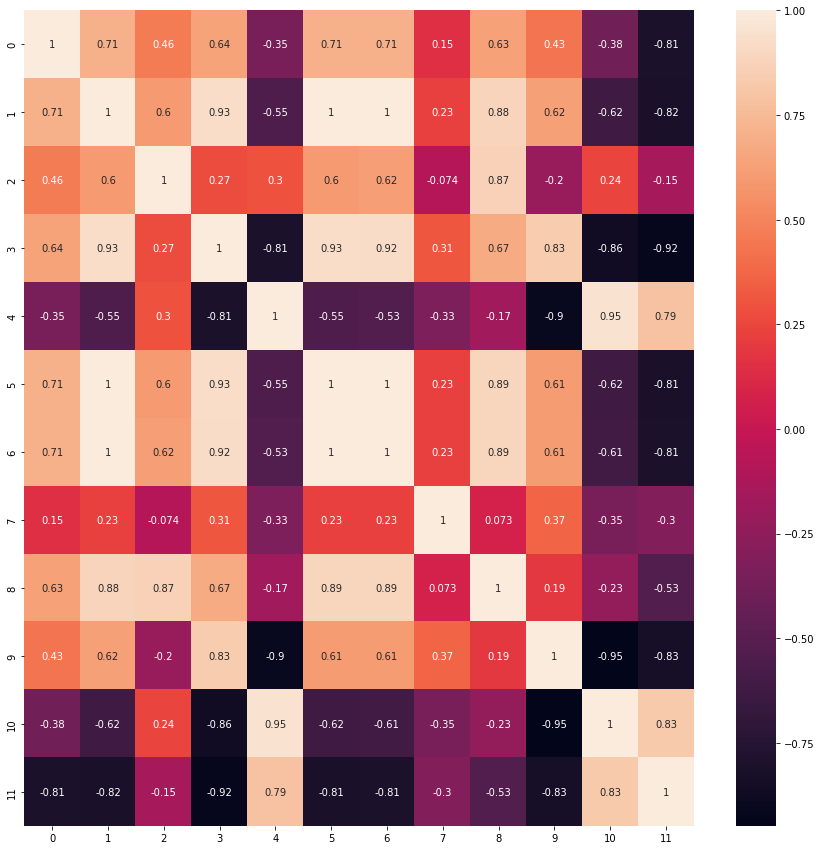

In [ ]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(15,15))
heatmap(corrs,annot = True)

In [ ]:
df.shape

(18185, 12)

Comparing MajorAxisLength and ConvexArea

In [ ]:
#picking which column you want to compare
X = df[['MajorAxisLength']].values
y = df['ConvexArea'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
est = LinearRegression()

est.fit(X_train,y_train)

y_pred = est.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.3689765120878882


In [ ]:
from sklearn.ensemble import RandomForestRegressor

est3 = RandomForestRegressor(max_features=0.5)
est3.fit(X_train, y_train)
y_pred = est3.predict(X_test)

print( r2_score(y_test, y_pred ) )

0.0805093711956939


RandomForest is getting worse result. This is because there is only one feature in X. Even if RandomForest usually returns better result, it doesn’t produce better result when there is only one feature. That is why RandomForestRegressor produces worse score.

Added feature. Dropping ConvexArea because it is a target value. Dropping ID because it is not the one I want to find a relation. Dropping MinorAxisLength, Perimeter, Area, because they have too high coefficient from heatmap.

In [ ]:
#picking which column you want to compare

X = df.drop(['id','EquivDiameter','MinorAxisLength', 'Perimeter','ConvexArea','Area','Class'],axis=1).values
y = df['ConvexArea'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
est = LinearRegression()

est.fit(X_train,y_train)

y_pred = est.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9860270416503601


Let's try PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([9.98734057e-01, 1.20067542e-03, 6.18320175e-05, 2.87780979e-06,
       5.57618705e-07])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pca = PCA(.999)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(14548, 2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
est = LinearRegression()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

print(r2_score(y_test, y_pred))

0.9853482843096257


In [ ]:
from sklearn.ensemble import RandomForestRegressor

est3 = RandomForestRegressor(max_features=0.5)
est3.fit(X_train, y_train)
y_pred = est3.predict(X_test)

print( r2_score(y_test, y_pred ) )

0.9974971624997565


Simple linear regression has better result than PCA. PCA reduce the noise and focus on more important factor of data which can contribute to the faster speed of calculation, but reduces accuracy. 
RandomForestRgressor has the best result. It picks up random features from X and then calculate result which usually give better accuracy. 


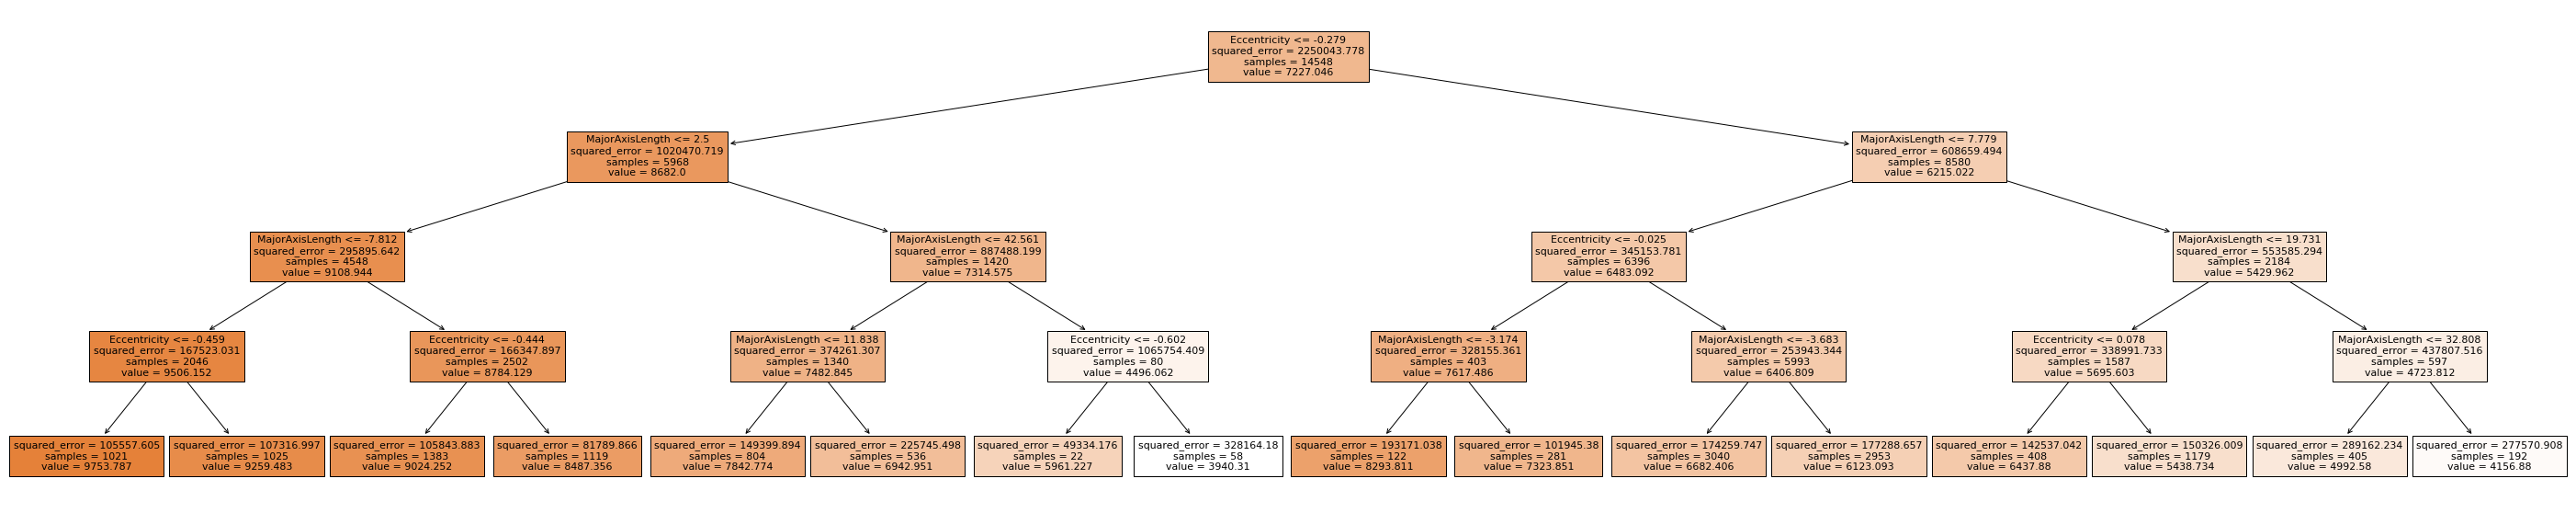

In [ ]:
plt.figure( figsize=(50,10))
#↓it means this. X = df.drop(['id','EquivDiameter','MinorAxisLength', 'Perimeter','ConvexArea','Area','Class'],axis=1).values
fn=['MajorAxisLength','Eccentricity','Extent','Roundness','AspectRation']
tn = ['Convex']
clf = tree.DecisionTreeRegressor(max_depth = 4)
clf.fit(X_train, y_train)

_ = tree.plot_tree(clf,feature_names = fn, filled = True)

When value is 9028.343 there are only 35 samples which is the least number of samples.
When value is 6305.36 there are 1868 samples which is the most number of samples.
This decision tree can produce only 16 unique values.


The purpose of regulation is to prevent overfitting. Even if it gets worse result it can be seen as a better model because it could predict future values better.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
#est = LinearRegression()
est = Lasso()
#est = Ridge()
#est = ElasticNet()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

print(r2_score(y_test,y_pred))

0.987180240372305


Classification

In [ ]:
X = df.values
y = df['Class'].values

In [ ]:
display(df) 

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


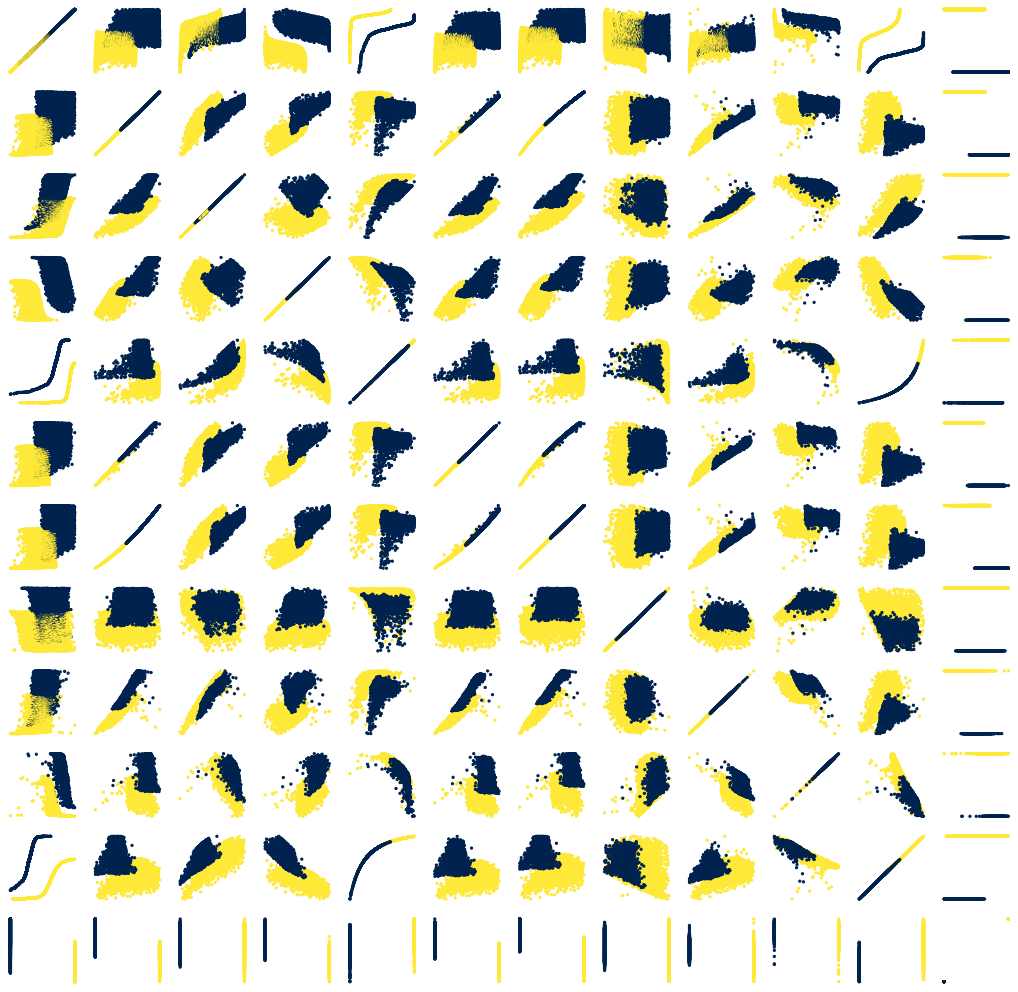

In [ ]:
# Scatter of each variable for each other variable
n = X.shape[1]
plt.figure(figsize=[18,18])

for i in range(n):
  for j in range(n):
    plt.subplot(n, n, i*n + j + 1)
    plt.scatter(X[:,i], X[:,j], c=y, s=5,cmap='cividis')
    plt.axis('off')

plt.show()

In [ ]:
X = df[['Extent','Eccentricity']].values#このfeatureを増やしてみれば色も増える。
y = df['Class'].values

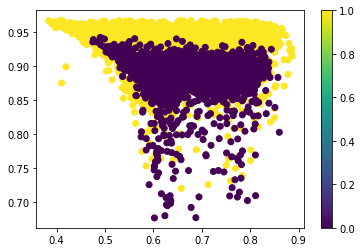

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

Let's do KNN and Logistic classification first

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_train)

X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
est = KNeighborsClassifier(n_neighbors=4,p=1)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.9587609970674487


Let's decide number of neighbors

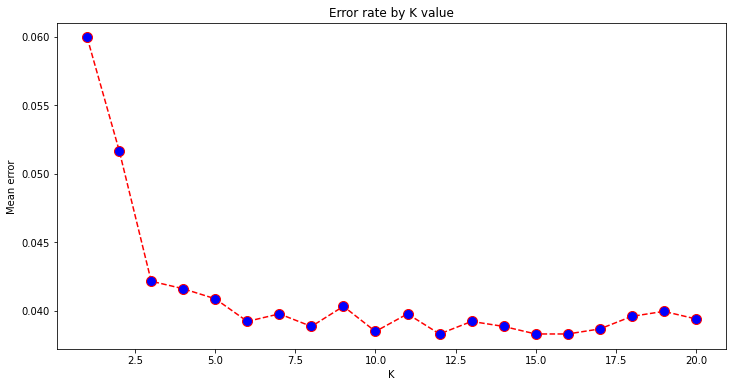

In [ ]:
error = []

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append( 1-accuracy_score(y_test, pred_i) )

plt.figure(figsize=(12,6))
plt.plot(range(1,21), error, color='red', linestyle='dashed', 
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate by K value')
plt.xlabel('K')
plt.ylabel('Mean error')
plt.show()

let's try 15 since it was displaying 15 is the best distance in my case.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
est = KNeighborsClassifier(n_neighbors=10,p=1)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.9618768328445748


Let's try Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
est = LogisticRegression()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.9583944281524927


let's try SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
est = SVC(kernel='linear')
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9598607038123167


Let's try cross validation

In [ ]:
X = df[['Extent','Eccentricity']].values
y = df['Class'].values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, LeaveOneOut,GridSearchCV, StratifiedShuffleSplit

est = KNeighborsClassifier()
#cv = LeaveOneOut()
#cv = KFold(n_splits=10, shuffle=True)
cv = StratifiedShuffleSplit(n_splits = 10)

param_grid = [{ 'n_neighbors' : range(1,11),
               'p' : range(1,11)},
              {'metric' :['mahalanobis'],
               'n_neighbors' : range(1,11),
               'metric_params' : [{'V': np.cov(X, rowvar=False)}]}]
              # 'weights' : ['uniform','distance'] }

search = GridSearchCV( est, param_grid, scoring = 'accuracy', cv=cv, n_jobs=-1 )

search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=None,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 11), 'p': range(1, 11)},
                         {'metric': ['mahalanobis'],
                          'metric_params': [{'V': array([[ 0.01089715, -0.00105312],
       [-0.00105312,  0.00093484]])}],
                          'n_neighbors': range(1, 11)}],
             scoring='accuracy')

In [ ]:
search.best_score_

0.9634964266080264

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score
est = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform')
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9584822656035193


The purpose of using cross validation here is to make a model that can avoid overfitting. By using this, I can make a model that can predict unknown future values better.

Let's do PCA

In [ ]:
#X = df.drop(['id','Class'],axis=1).values
X = df[['Extent','Eccentricity']].values
y = df['Class'].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(X)
X_trans = pca.transform(X)

In [ ]:
pca.components_

array([[ 0.99457855, -0.10398798],
       [-0.10398798, -0.99457855]])

In [ ]:
pca.explained_variance_ratio_

array([0.9302966, 0.0697034])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7, p=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9601319769040418


In [ ]:
X = df[['Extent','AspectRation','Eccentricity']].values
#X = df[['Extent','Roundness']].values
y = df['Class'].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(X)
X_trans = pca.transform(X)

In [ ]:
pca.components_

array([[-0.0881153 ,  0.9938922 ,  0.06643779],
       [ 0.99610953,  0.08783697,  0.00710457]])

In [ ]:
pca.explained_variance_ratio_

array([0.95234103, 0.04721005])

So, by adding AspectRation first dimentsion become more important. 

Let's do decision tree

In [ ]:
import sklearn.model_selection as ms
import sklearn.tree as tree

In [ ]:
X = df[['Extent','Eccentricity']].values
y = df['Class'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

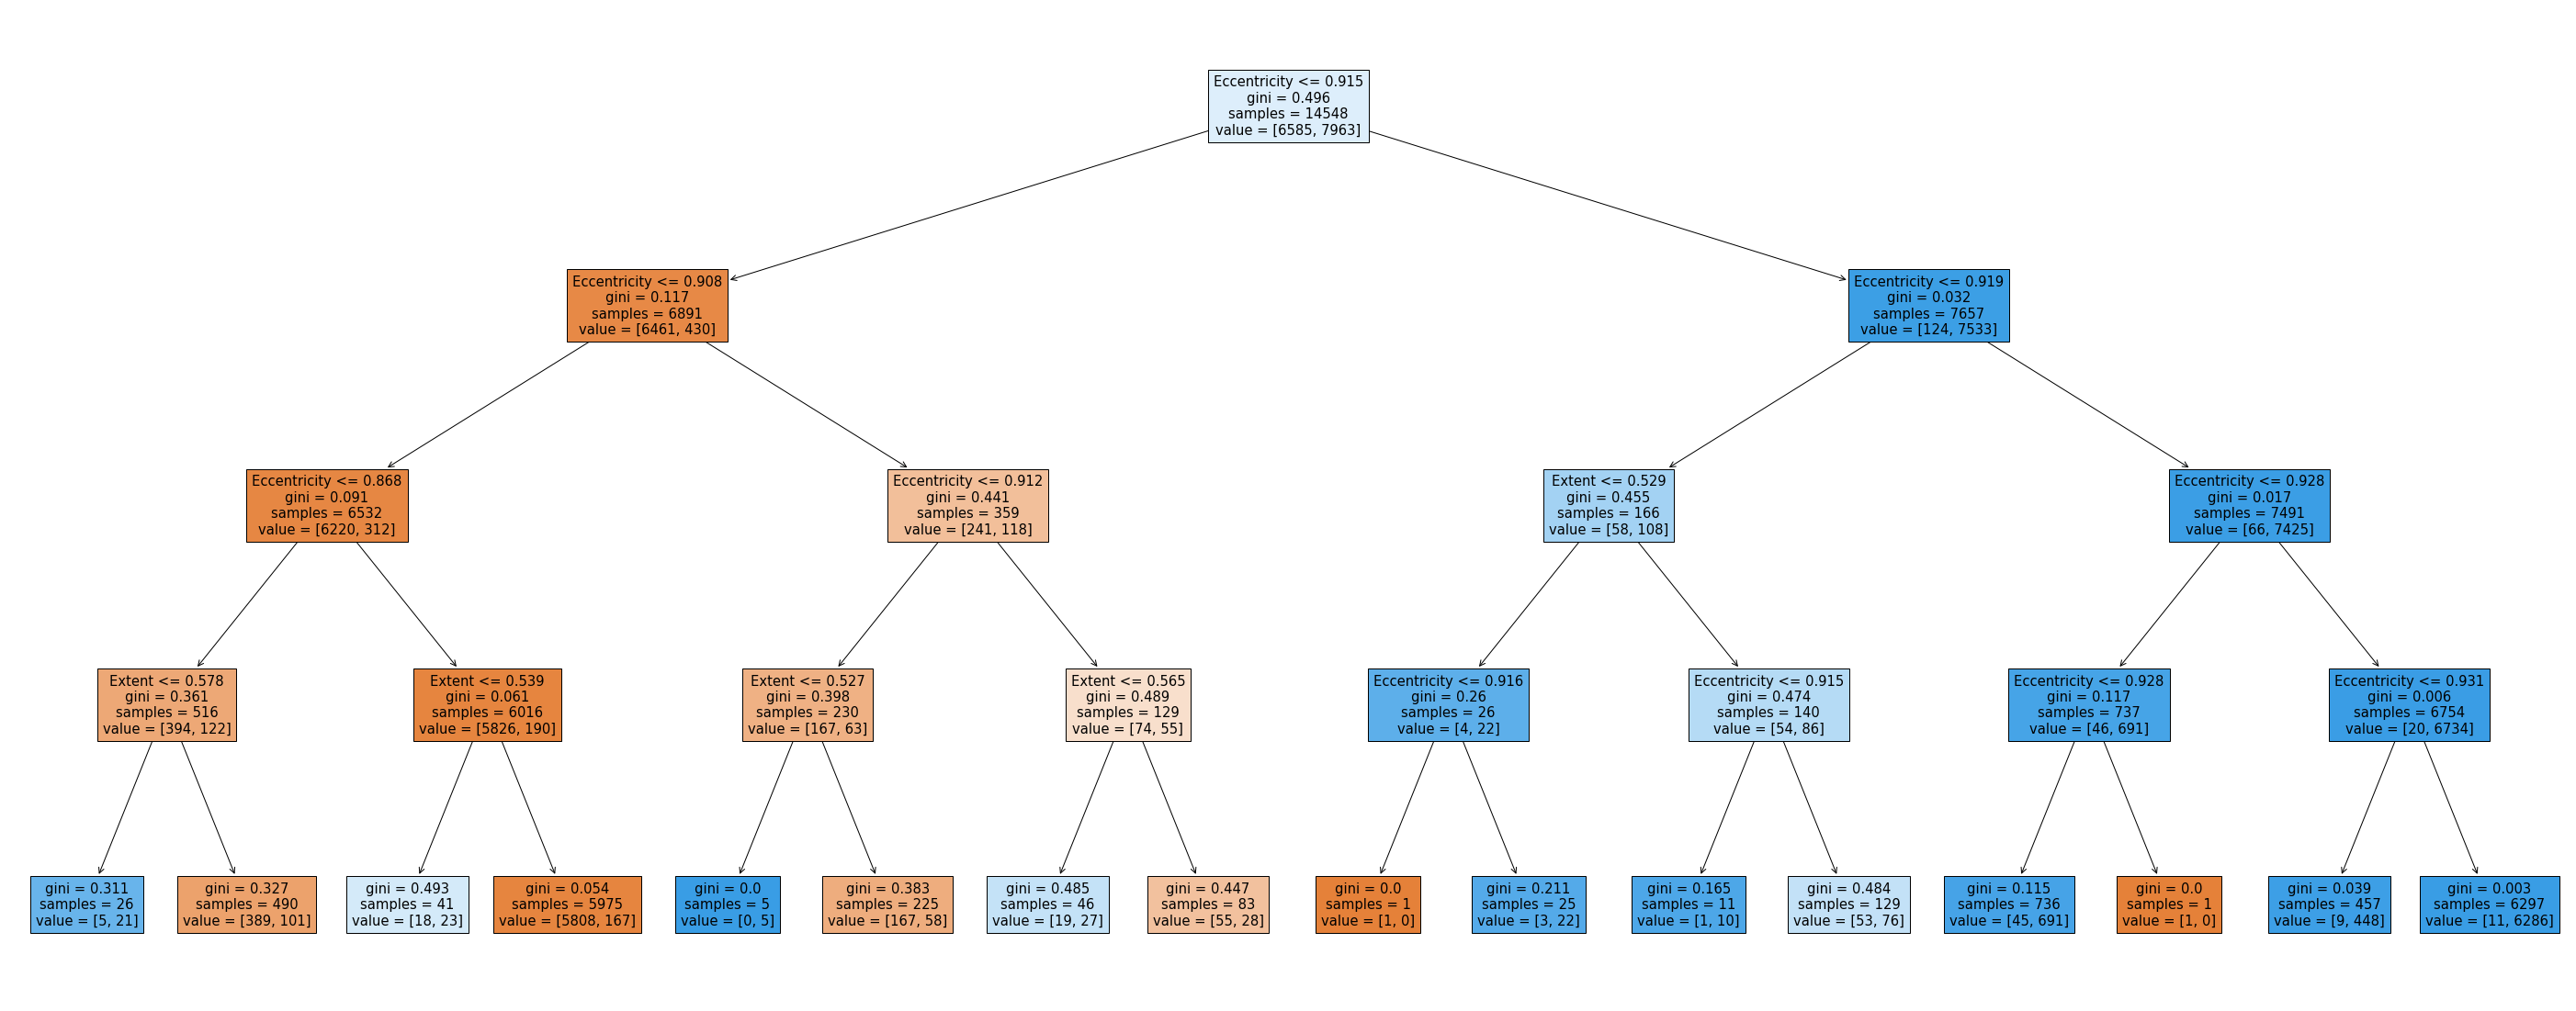

In [ ]:
plt.figure( figsize=(50,20))
fn=['Extent','Eccentricity']
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)

_ = tree.plot_tree(clf,feature_names = fn, filled = True)

From this decision tree it can say that there are not much possibility that decision tree classifies data as Jasmin when Extent and Eccentricity are low because there are more of Gonen on the left side and Jasmin on the right side. 